In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Checking the statestical information of the numeric variables 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Missing value treatment

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'],axis=1,inplace=True)

In [11]:
df.isnull().sum()/len(df)*100

Survived     0.00000
Pclass       0.00000
Sex          0.00000
Age         19.86532
SibSp        0.00000
Parch        0.00000
dtype: float64

In [12]:
df['Age']=df['Age'].fillna(value=df['Age'].median())

# EDA

<AxesSubplot:>

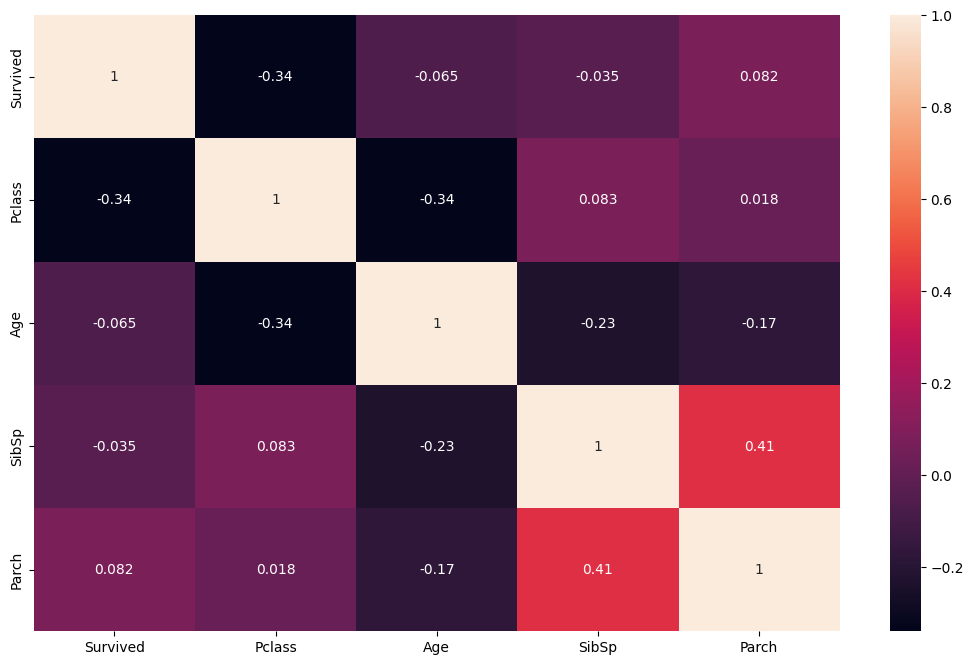

In [13]:
# co-relation Checking
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True)

In [14]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594
std,0.486592,0.836071,13.019697,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [15]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

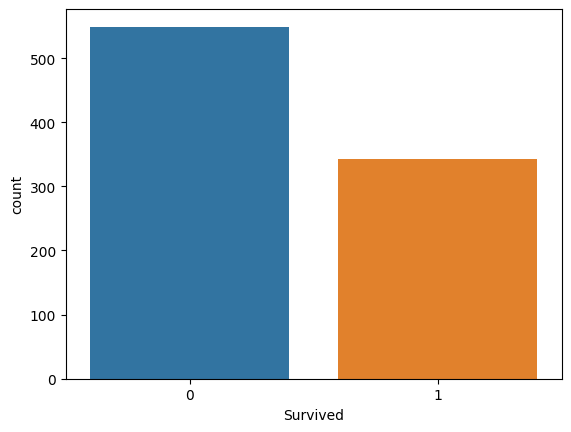

In [16]:
# Countplot of survived vs not survived
sns.countplot(x='Survived',data=df)
plt.show()

In [17]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

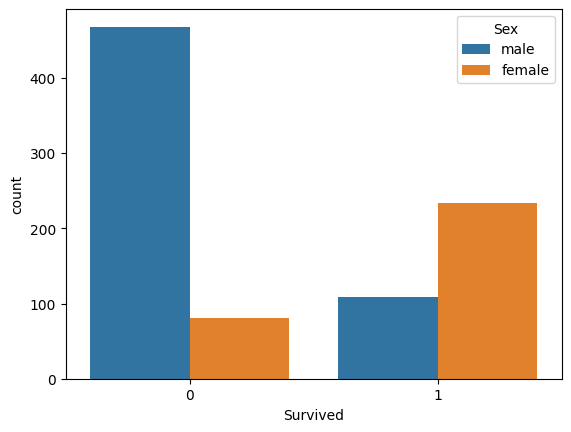

In [18]:
# Male vs Female survived
sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

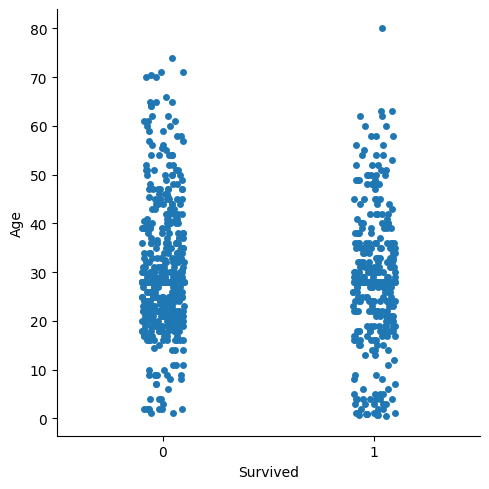

In [19]:
sns.catplot(x="Survived", y="Age",data=df)

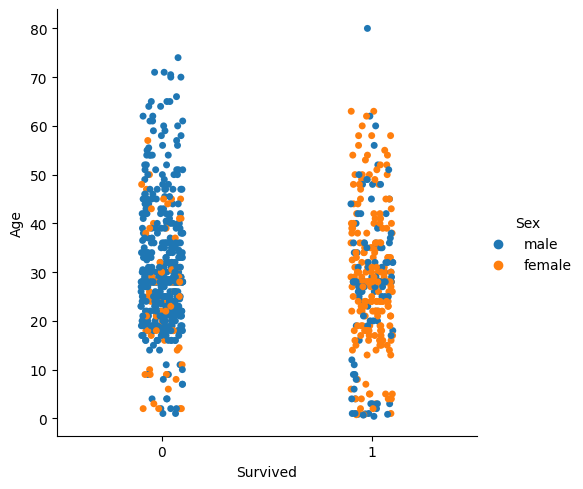

In [20]:
sns.catplot(x="Survived", y="Age",hue='Sex',data=df)

<AxesSubplot:>

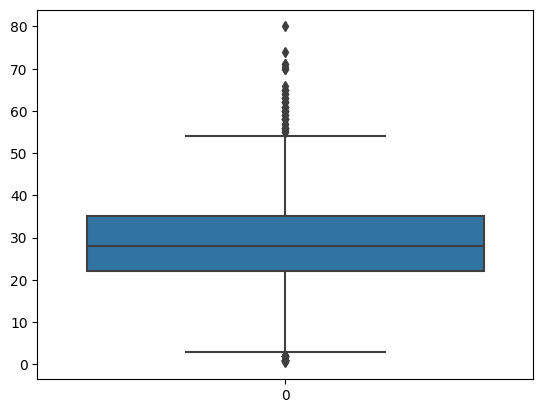

In [21]:
sns.boxplot(df['Age'])

In [22]:
Q1 = np.percentile(df['Age'], 25)
Q3 = np.percentile(df['Age'], 75)
IQR = Q3 - Q1
IQR

13.0

In [23]:
lower_bound = Q1 - (1.5 * IQR)
lower_bound

2.5

In [24]:
upper_bound = Q3 + (1.5 * IQR)
upper_bound

54.5

In [25]:
df['Age'] = np.where(df['Age'] > 54.5,54.5,df['Age'])

In [26]:
df['Age'] = np.where(df['Age'] < 2.5,2.5,df['Age'])

<AxesSubplot:>

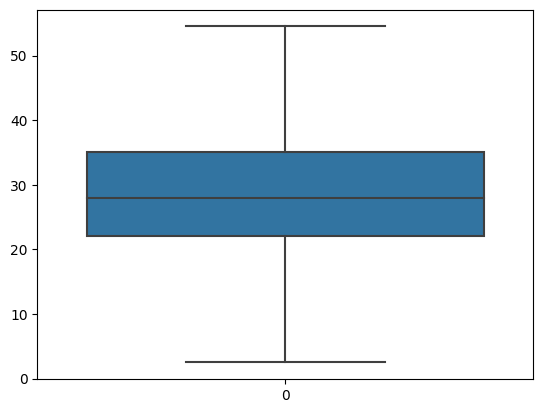

In [27]:
sns.boxplot(df['Age'])

# converting Categorical col to numerical

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [29]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [30]:
df['Sex'] = df['Sex'].replace(to_replace = {'male' : 0, 'female' : 1})

In [31]:
df.shape

(891, 6)

# Model Building

In [32]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [34]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
x_train

array([[ 0.83012938, -0.72705166, -0.09930544, -0.46037161, -0.47720996],
       [ 0.83012938,  1.37541808, -1.01543402,  2.98532288,  1.95619654],
       [ 0.83012938, -0.72705166,  0.06726339,  0.40105202, -0.47720996],
       ...,
       [ 0.83012938, -0.72705166, -0.09930544, -0.46037161, -0.47720996],
       [ 0.83012938,  1.37541808,  0.56696988,  0.40105202, -0.47720996],
       [-0.36497068, -0.72705166,  2.10773157,  0.40105202,  0.73949329]])

In [36]:
x_test

array([[ 0.83012938, -0.72705166, -0.09930544, -0.46037161, -0.47720996],
       [ 0.83012938, -0.72705166, -0.09930544, -0.46037161, -0.47720996],
       [ 0.83012938, -0.72705166, -1.84827818,  2.98532288,  0.73949329],
       ...,
       [ 0.83012938, -0.72705166, -0.84886519, -0.46037161, -0.47720996],
       [-1.56007074,  1.37541808, -0.68229635,  1.26247564,  1.95619654],
       [ 0.83012938,  1.37541808, -2.09813142,  0.40105202,  0.73949329]])

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
classifier= KNeighborsClassifier(n_neighbors=7, metric="minkowski",p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [39]:
y_pred1 = classifier.predict(x_test)

In [40]:
print('Training Score:',100*classifier.score(x_train,y_train))
print('Testing Score :',100*classifier.score(x_test,y_test))

Training Score: 82.78443113772454
Testing Score : 78.9237668161435


In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
#Printing Confussion matrix
cm = confusion_matrix(y_test, y_pred1)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[116  23]
 [ 24  60]]


In [43]:
#Printing Classiification Report
print('Classification Report:\n ' + str(classification_report(y_pred1,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       140
           1       0.71      0.72      0.72        83

    accuracy                           0.79       223
   macro avg       0.77      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



# NB

In [44]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

In [45]:
y_pred1 = clf.predict(x_test)

In [46]:
print('Training Score:',100*clf.score(x_train,y_train))
print('Testing Score :',100*clf.score(x_test,y_test))

Training Score: 77.09580838323353
Testing Score : 77.13004484304933


In [47]:
#Printing Confussion matrix
cm = confusion_matrix(y_test, y_pred1)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[111  28]
 [ 23  61]]


In [48]:
#Printing Classiification Report
print('Classification Report:\n ' + str(classification_report(y_pred1,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       134
           1       0.73      0.69      0.71        89

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



# SVM

In [49]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [50]:
y_pred1 = sv.predict(x_test)

In [51]:
print('Training Score:',100*sv.score(x_train,y_train))
print('Testing Score :',100*sv.score(x_test,y_test))

Training Score: 83.8323353293413
Testing Score : 82.0627802690583


In [52]:
#Printing Confussion matrix
cm = confusion_matrix(y_test, y_pred1)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[121  18]
 [ 22  62]]


In [53]:
#Printing Classiification Report
print('Classification Report:\n ' + str(classification_report(y_pred1,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       143
           1       0.74      0.78      0.76        80

    accuracy                           0.82       223
   macro avg       0.80      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
logicstic = LogisticRegression()
logicstic.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred1 = logicstic.predict(x_test)

In [56]:
print('Training Score:',100*logicstic.score(x_train,y_train))
print('Testing Score :',100*logicstic.score(x_test,y_test))

Training Score: 78.44311377245509
Testing Score : 79.82062780269058


In [57]:
#Printing Confussion matrix
cm = confusion_matrix(y_test, y_pred1)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[116  23]
 [ 22  62]]


In [58]:
#Printing Classiification Report
print('Classification Report:\n ' + str(classification_report(y_pred1,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       138
           1       0.74      0.73      0.73        85

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



# DecisionTreeClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred1 = DT.predict(x_test)

In [61]:
print('Training Score:',100*logicstic.score(x_train,y_train))
print('Testing Score :',100*logicstic.score(x_test,y_test))

Training Score: 78.44311377245509
Testing Score : 79.82062780269058


In [62]:
#Printing Confussion matrix
cm = confusion_matrix(y_test, y_pred1)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[119  20]
 [ 29  55]]


In [63]:
#Printing Classiification Report
print('Classification Report:\n ' + str(classification_report(y_pred1,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       148
           1       0.65      0.73      0.69        75

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.79      0.78      0.78       223



# RandomForest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
y_pred1 = RF.predict(x_test)

In [66]:
print('Training Score:',100*RF.score(x_train,y_train))
print('Testing Score :',100*RF.score(x_test,y_test))

Training Score: 92.06586826347305
Testing Score : 80.26905829596413


In [67]:
#Printing Confussion matrix
cm = confusion_matrix(y_test, y_pred1)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[118  21]
 [ 23  61]]


In [68]:
#Printing Classiification Report
print('Classification Report:\n ' + str(classification_report(y_pred1,y_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       141
           1       0.73      0.74      0.73        82

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

